### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [5]:
total_loja1 = loja['Preço'].sum()
total_loja2 = loja2['Preço'].sum()
total_loja3 = loja3['Preço'].sum()
total_loja4 = loja4['Preço'].sum()

print(f"Total faturamento Loja 1: {total_loja1}")
print(f"Total faturamento Loja 2: {total_loja2}")
print(f"Total faturamento Loja 3: {total_loja3}")
print(f"Total faturamento Loja 4: {total_loja4}")

Total faturamento Loja 1: 1534509.12
Total faturamento Loja 2: 1488459.06
Total faturamento Loja 3: 1464025.03
Total faturamento Loja 4: 1384497.58


In [7]:
Faturamento = {'Loja 1': total_loja1, 'Loja 2': total_loja2, 'Loja 3': total_loja3, 'Loja 4': total_loja4}
Faturamento = pd.Series(Faturamento)
Faturamento.sort_values(ascending=False)

,0
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


# 2. Vendas por Categoria


In [10]:
vendas_categoria_loja1 = loja['Categoria do Produto'].value_counts()
vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts()

print("Vendas por Categoria - Loja 1:")
print(vendas_categoria_loja1)
print("\nVendas por Categoria - Loja 2:")
print(vendas_categoria_loja2)
print("\nVendas por Categoria - Loja 3:")
print(vendas_categoria_loja3)
print("\nVendas por Categoria - Loja 4:")
print(vendas_categoria_loja4)



Vendas por Categoria - Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Vendas por Categoria - Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Vendas por Categoria - Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Vendas por Categoria - Loja 4:
Categoria do Produto
moveis         

In [9]:
print("\nCategoria mais popular por loja:")
print(f"Loja 1: {vendas_categoria_loja1.idxmax()}")
print(f"Loja 2: {vendas_categoria_loja2.idxmax()}")
print(f"Loja 3: {vendas_categoria_loja3.idxmax()}")
print(f"Loja 4: {vendas_categoria_loja4.idxmax()}")


Categoria mais popular por loja:
Loja 1: moveis
Loja 2: moveis
Loja 3: moveis
Loja 4: moveis


In [61]:
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

total_vendas_por_categoria = todas_lojas.groupby('Categoria do Produto')['Preço'].sum()

print("\nTotal de vendas por categoria (soma das 4 lojas):")
total_vendas_por_categoria


Total de vendas por categoria (soma das 4 lojas):


,Preço
Categoria do Produto,
brinquedos,98140.86
eletrodomesticos,1766337.03
eletronicos,2214099.72
esporte e lazer,190635.39
instrumentos musicais,465029.67
livros,50260.74
moveis,1010214.00
utilidades domesticas,76773.38


In [63]:
total_produtos_por_categoria = todas_lojas['Categoria do Produto'].value_counts()

print("\nNúmero total de produtos vendidos por categoria (soma das 4 lojas):")
total_produtos_por_categoria


Número total de produtos vendidos por categoria (soma das 4 lojas):


,count
Categoria do Produto,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149
esporte e lazer,1113
instrumentos musicais,753
livros,742
utilidades domesticas,730


# 3. Média de Avaliação das Lojas

In [12]:
import pandas as pd
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

print(f"Média de Avaliação Loja 1: {media_avaliacao_loja1}")
print(f"Média de Avaliação Loja 2: {media_avaliacao_loja2}")
print(f"Média de Avaliação Loja 3: {media_avaliacao_loja3}")
print(f"Média de Avaliação Loja 4: {media_avaliacao_loja4}")

media_avaliacoes = {
    'Loja 1': media_avaliacao_loja1,
    'Loja 2': media_avaliacao_loja2,
    'Loja 3': media_avaliacao_loja3,
    'Loja 4': media_avaliacao_loja4
}

media_avaliacoes_series = pd.Series(media_avaliacoes)
print("\nMédia de Avaliação por Loja:")
media_avaliacoes_series

Média de Avaliação Loja 1: 3.976685036032217
Média de Avaliação Loja 2: 4.037303942348453
Média de Avaliação Loja 3: 4.048325561678677
Média de Avaliação Loja 4: 3.9957591178965224

Média de Avaliação por Loja:


,0
Loja 1,3.976685
Loja 2,4.037304
Loja 3,4.048326
Loja 4,3.995759


In [22]:
print("\nContagem de avaliações por nota em cada loja:")
print("Loja 1:")
print(loja['Avaliação da compra'].value_counts().sort_index())
print("\nLoja 2:")
print(loja2['Avaliação da compra'].value_counts().sort_index())
print("\nLoja 3:")
print(loja3['Avaliação da compra'].value_counts().sort_index())
print("\nLoja 4:")
print(loja4['Avaliação da compra'].value_counts().sort_index())


Contagem de avaliações por nota em cada loja:
Loja 1:
Avaliação da compra
1     319
2      86
3     218
4     444
5    1292
Name: count, dtype: int64

Loja 2:
Avaliação da compra
1     273
2      93
3     209
4     482
5    1302
Name: count, dtype: int64

Loja 3:
Avaliação da compra
1     297
2      79
3     193
4     434
5    1356
Name: count, dtype: int64

Loja 4:
Avaliação da compra
1     310
2      85
3     210
4     453
5    1300
Name: count, dtype: int64


# 4. Produtos Mais e Menos Vendidos

In [14]:
# Agrupar por produto e contar as vendas em cada loja
vendas_produto_loja1 = loja['Produto'].value_counts()
vendas_produto_loja2 = loja2['Produto'].value_counts()
vendas_produto_loja3 = loja3['Produto'].value_counts()
vendas_produto_loja4 = loja4['Produto'].value_counts()

print("Produtos Mais e Menos Vendidos por Loja:")

# Loja 1
print("\n--- Loja 1 ---")
print("Produto Mais Vendido:")
print(vendas_produto_loja1.idxmax())
print("Produto Menos Vendido:")
print(vendas_produto_loja1.idxmin())

# Loja 2
print("\n--- Loja 2 ---")
print("Produto Mais Vendido:")
print(vendas_produto_loja2.idxmax())
print("Produto Menos Vendido:")
print(vendas_produto_loja2.idxmin())

# Loja 3
print("\n--- Loja 3 ---")
print("Produto Mais Vendido:")
print(vendas_produto_loja3.idxmax())
print("Produto Menos Vendido:")
print(vendas_produto_loja3.idxmin())

# Loja 4
print("\n--- Loja 4 ---")
print("Produto Mais Vendido:")
print(vendas_produto_loja4.idxmax())
print("Produto Menos Vendido:")
print(vendas_produto_loja4.idxmin())

Produtos Mais e Menos Vendidos por Loja:

--- Loja 1 ---
Produto Mais Vendido:
Micro-ondas
Produto Menos Vendido:
Headset

--- Loja 2 ---
Produto Mais Vendido:
Iniciando em programação
Produto Menos Vendido:
Jogo de tabuleiro

--- Loja 3 ---
Produto Mais Vendido:
Kit banquetas
Produto Menos Vendido:
Blocos de montar

--- Loja 4 ---
Produto Mais Vendido:
Cama box
Produto Menos Vendido:
Guitarra


In [60]:
media_preco_categoria_loja1 = loja.groupby('Categoria do Produto')['Preço'].mean()
media_preco_categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].mean()
media_preco_categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].mean()
media_preco_categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].mean()

print("Valor Médio por Categoria do Produto - Loja 1:")
print(media_preco_categoria_loja1)

print("\nValor Médio por Categoria do Produto - Loja 2:")
print(media_preco_categoria_loja2)

print("\nValor Médio por Categoria do Produto - Loja 3:")
print(media_preco_categoria_loja3)

print("\nValor Médio por Categoria do Produto - Loja 4:")
print(media_preco_categoria_loja4)

media_preco_categoria_combinada = pd.DataFrame({
    'Loja 1': media_preco_categoria_loja1,
    'Loja 2': media_preco_categoria_loja2,
    'Loja 3': media_preco_categoria_loja3,
    'Loja 4': media_preco_categoria_loja4
})

print("\nValor Médio por Categoria do Produto em todas as Lojas:")
media_preco_categoria_combinada

Valor Médio por Categoria do Produto - Loja 1:
Categoria do Produto
brinquedos                 74.054877
eletrodomesticos         1554.209487
eletronicos              1278.257210
esporte e lazer           184.463204
instrumentos musicais     668.855440
livros                     67.710520
moveis                    538.017441
utilidades domesticas      99.014503
Name: Preço, dtype: float64

Valor Médio por Categoria do Produto - Loja 2:
Categoria do Produto
brinquedos                 67.930383
eletrodomesticos         1523.797148
eletronicos              1298.041967
esporte e lazer           168.458509
instrumentos musicais     624.942098
livros                     68.296193
moveis                    532.205158
utilidades domesticas     108.634586
Name: Preço, dtype: float64

Valor Médio por Categoria do Produto - Loja 3:
Categoria do Produto
brinquedos                 82.124444
eletrodomesticos         1579.082338
eletronicos              1214.412239
esporte e lazer           171.32166

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,74.054877,67.930383,82.124444,79.928018
eletrodomesticos,1554.209487,1523.797148,1579.082338,1486.931693
eletronicos,1278.257210,1298.041967,1214.412239,1210.569534
esporte e lazer,184.463204,168.458509,171.321661,160.525812
instrumentos musicais,668.855440,624.942098,582.906497,589.038235
livros,67.710520,68.296193,68.457838,66.458663
moveis,538.017441,532.205158,537.265651,534.803437
utilidades domesticas,99.014503,108.634586,113.447514,99.994179


# 5. Frete Médio por Loja


In [16]:
media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

print(f"Custo médio de frete Loja 1: {media_frete_loja1}")
print(f"Custo médio de frete Loja 2: {media_frete_loja2}")
print(f"Custo médio de frete Loja 3: {media_frete_loja3}")
print(f"Custo médio de frete Loja 4: {media_frete_loja4}")

media_frete = {
    'Loja 1': media_frete_loja1,
    'Loja 2': media_frete_loja2,
    'Loja 3': media_frete_loja3,
    'Loja 4': media_frete_loja4
}

media_frete_series = pd.Series(media_frete)
print("\nCusto Médio de Frete por Loja:")
media_frete_series

Custo médio de frete Loja 1: 34.69180491551149
Custo médio de frete Loja 2: 33.62194065817927
Custo médio de frete Loja 3: 33.07446427411743
Custo médio de frete Loja 4: 31.278997081841727

Custo Médio de Frete por Loja:


,0
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


# Visualização dos dados


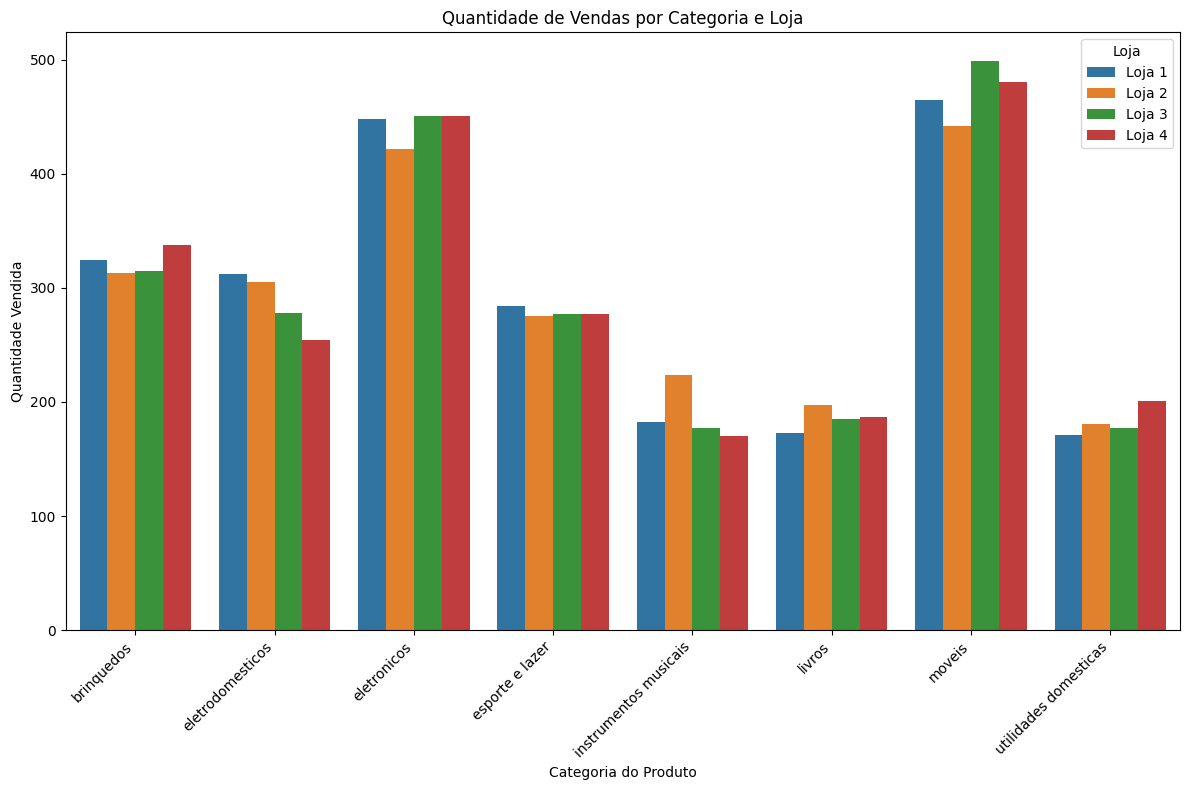

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


todas_lojas = pd.concat([loja.assign(Loja='Loja 1'),
                         loja2.assign(Loja='Loja 2'),
                         loja3.assign(Loja='Loja 3'),
                         loja4.assign(Loja='Loja 4')])


vendas_por_loja_categoria = todas_lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade Vendida')


plt.figure(figsize=(12, 8))
sns.barplot(data=vendas_por_loja_categoria, x='Categoria do Produto', y='Quantidade Vendida', hue='Loja')
plt.title('Quantidade de Vendas por Categoria e Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Podemos visualizar a partir desse grafico que a categoria de produtos mais vendidos são os moveis, e em seguida vem os eletronicos.


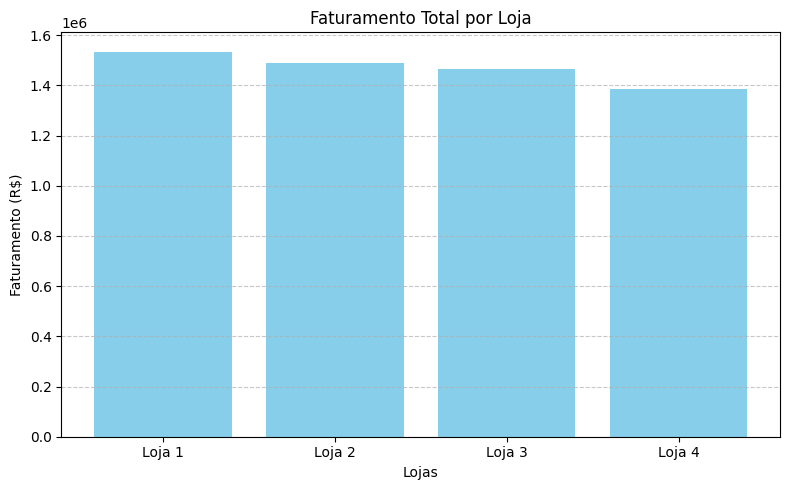

In [53]:

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamento, color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Atraves desse grafico percebemos que o faturamento total da loja 1 é maior que as outras, assim como o faturamento da loja 4 é o menor.

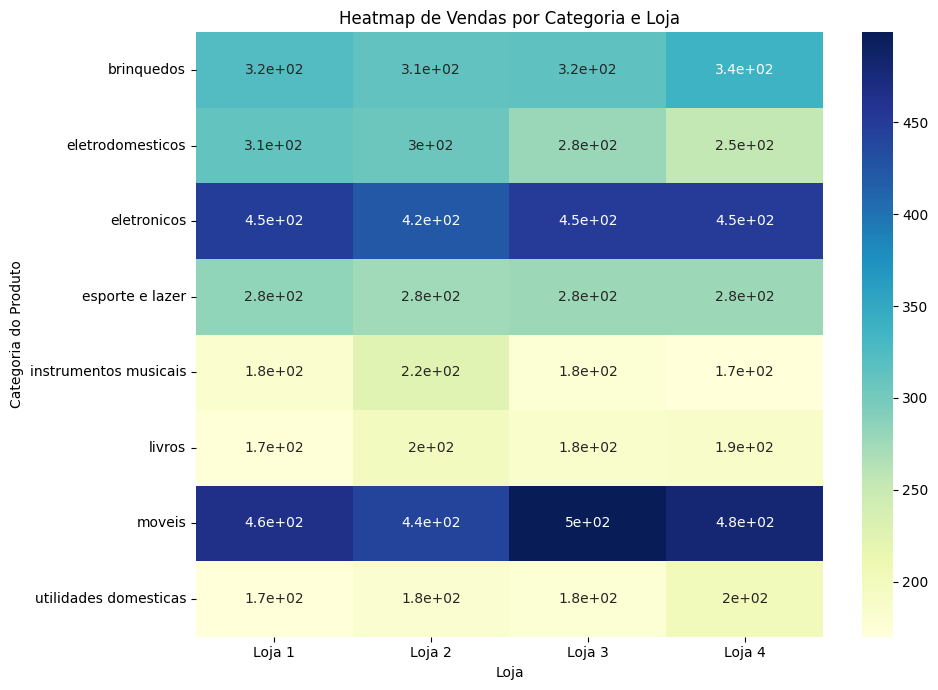

In [57]:

heatmap_data = vendas_por_loja_categoria.pivot_table(index='Categoria do Produto', columns='Loja', values='Quantidade Vendida', fill_value=0)

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Heatmap de Vendas por Categoria e Loja')
plt.xlabel('Loja')
plt.ylabel('Categoria do Produto')
plt.tight_layout()
plt.show()

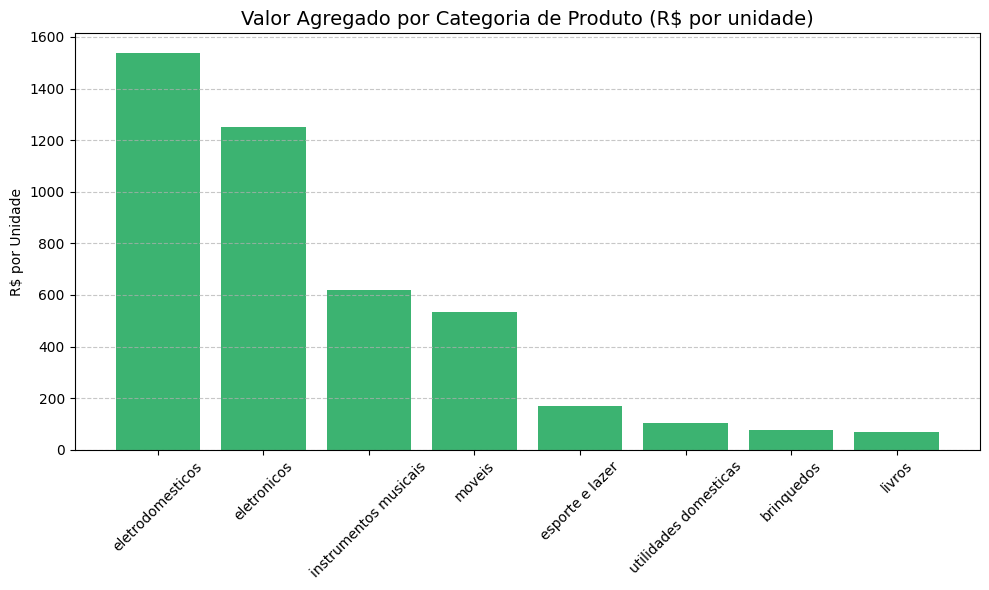

In [66]:

quantidade_categoria = {
    'moveis': 1886,
    'eletronicos': 1772,
    'brinquedos': 1290,
    'eletrodomesticos': 1149,
    'esporte e lazer': 1113,
    'instrumentos musicais': 753,
    'livros': 742,
    'utilidades domesticas': 730
}

preco_categoria = {
    'brinquedos': 98140.86,
    'eletrodomesticos': 1766337.03,
    'eletronicos': 2214099.72,
    'esporte e lazer': 190635.39,
    'instrumentos musicais': 465029.67,
    'livros': 50260.74,
    'moveis': 1010214.00,
    'utilidades domesticas': 76773.38
}


valor_agregado = {
    categoria: preco_categoria[categoria] / quantidade_categoria[categoria]
    for categoria in quantidade_categoria
}

# Ordenar por valor agregado
valor_agregado_ordenado = dict(sorted(valor_agregado.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(valor_agregado_ordenado.keys(), valor_agregado_ordenado.values(), color='mediumseagreen')
plt.title('Valor Agregado por Categoria de Produto (R$ por unidade)', fontsize=14)
plt.ylabel('R$ por Unidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Relatorio


 # 📊 **Relatório de Análise de Desempenho das Lojas**

 ## 🧾 **Resumo dos Dados Analisados**
 Foram avaliadas 4 lojas com base em:
 - Faturamento total  
 - Volume de vendas por categoria  
 - Média de avaliação dos clientes  
 - Valor agregado por categoria de produto  

 ---

 ## 1. 💰 **Faturamento Total**

 | Loja   | Faturamento (R$)     |
 |--------|----------------------|
 | Loja 1 | 1.534.509,12         |
 | Loja 2 | 1.488.459,06         |
 | Loja 3 | 1.464.025,03         |
 | Loja 4 | **1.384.497,58**     |

 🔻 A **Loja 4 apresenta o menor faturamento** entre todas.

 ---

 ## 2. 📦 **Volume de Vendas por Categoria**
 As lojas possuem uma distribuição semelhante entre as categorias, com pequenas variações.
 No entanto, a **Loja 4** apresenta uma leve desvantagem no volume total de vendas quando comparada às demais.

 ---

 ## 3. ⭐ **Média de Avaliações dos Clientes**

 | Loja   | Avaliação Média      |
 |--------|----------------------|
 | Loja 1 | 3.98                 |
 | Loja 2 | 4.04                 |
 | Loja 3 | **4.05**             |
 | Loja 4 | 3.99                 |

 🔸 A Loja 4 possui uma avaliação intermediária, **sem se destacar positivamente**.

 ---

 ## 4. 🏆 **Valor Agregado por Categoria**
 Foi analisado o valor médio gerado por unidade vendida em cada categoria.  
 As categorias com maior valor agregado foram:

 - **Eletrodomésticos**  
 - **Eletrônicos**  
 - **Instrumentos Musicais**

 A **Loja 4** tem vendas significativas em **categorias de menor valor agregado**,
 como brinquedos, livros e utilidades domésticas, o que impacta negativamente sua performance geral.

 ---

 ## 📌 **Conclusão e Recomendação**

 ### ❌ **Recomendação: Fechar a Loja 4**

 ### Motivos:
 - **Menor faturamento total**
 - **Desempenho mediano nas avaliações**
 - **Vendas concentradas em categorias de menor valor agregado**
 - **Sem destaque competitivo em nenhuma métrica-chave analisada**

